# SARIMA

While classical ARIMA accepts a set of three parameters (p,d,q), SARIMA or Seasonal-ARIMA accepts an additional list of three parameters (P,D,Q,m) that specifically describes the seasonal component of the data. Here P, D, Q describe the seasonal regression, differencing and moving average coefficients and m describes the number of points (rows) in each seasonal cycle (i.e. for monthly data with yearly seasonal cycles, m=12).

The statsmodels representation of SARIMA is called SARIMAX where 'X' denotes that the function also supports exogenous regressor variables.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
df = pd.read_csv('../Data/co2_mm_mlo.csv')

In [7]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
df['date'] = pd.to_datetime({'year':df['year'],'month':df['month'], 'day':1})

In [9]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
df = df.set_index('date')

In [11]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [12]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='date'>

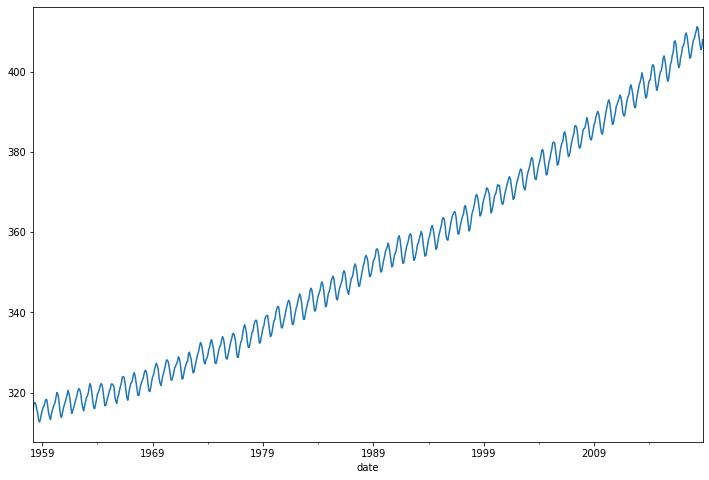

In [13]:
df['interpolated'].plot(figsize=(12,8))

we do see some seasonality in the data. but let's do a seasonal decomposition.

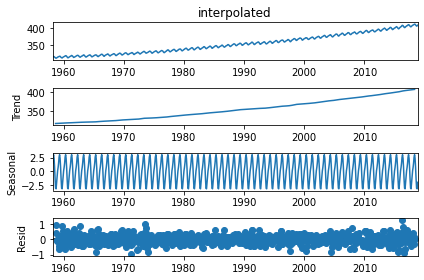

In [14]:
result = seasonal_decompose(df['interpolated'],model='add')
result.plot();

We see clear seasonality.

In [15]:
# getting prescribed orders by running auto-arima
auto_arima(df['interpolated'], seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.686
Date:                              Tue, 15 Dec 2020   AIC                            423.372
Time:                                      21:36:14   BIC                            450.913
Sample:                                           0   HQIC                           433.999
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3562      0.030    -11.852      0.000      -0.415      -0.297
ma.L2         -0.0223      0.027     -0.839      0.401      -0.075       0.030
ma.L3         -0.0858      0.034     -2.546      0.011      -0.152      -0.020
ar.S.L12       0.9996      0.000   2952.980      0.000       0.999       1.000
ma.S.L12      -0.8668      0.021    -40.744      0.000      -0.909      -0.825
sigma2         0.0955      0.005     20.570      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.07
Prob(Q):                              0.79   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
train = df.iloc[:717]
test = df.iloc[717:]

In [17]:
model = SARIMAX(train['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))

In [18]:
results = model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.198
Date:                              Tue, 15 Dec 2020   AIC                            414.395
Time:                                      21:36:38   BIC                            441.838
Sample:                                  03-01-1958   HQIC                           424.992
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3538      0.034    -10.486      0.000      -0.420      -0.288
ma.L2         -0.0244      0.020     -1.249      0.212      -0.063       0.014
ma.L3         -0.0874      0.023     -3.870      0.000      -0.132      -0.043
ar.S.L12       0.9996      0.000   2856.982      0.000       0.999       1.000
ma.S.L12      -0.8648      0.023    -38.146      0.000      -0.909      -0.820
sigma2         0.0951      0.005     20.287      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.27
Prob(Q):                              0.77   Prob(JB):                         0.12
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# making predictions
start = len(train); end=start+len(test)-1
predictions = results.predict(start,end,typ='levels').rename('SARIMA Predictions')

<AxesSubplot:xlabel='date'>

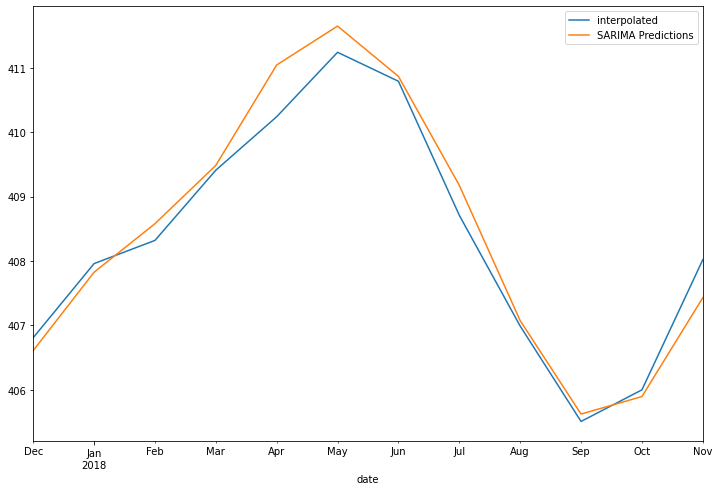

In [21]:
test['interpolated'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

So, our predictions seem to be pretty good.

In [22]:
# Evaluating predictions

from statsmodels.tools.eval_measures import rmse

In [23]:
error = rmse(test['interpolated'],predictions)
error

0.35842308942706463

In [24]:
error/test['interpolated'].mean()

0.0008777708312499542

which seems to be pretty darn good.

### forecasting into the unknown future

In [25]:
model = SARIMAX(df['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))

In [27]:
results = model.fit()

In [28]:
fcast = results.predict(start=len(df),end=len(df)+11,typ='levels').rename('SARIMA Forecast')

<AxesSubplot:xlabel='date'>

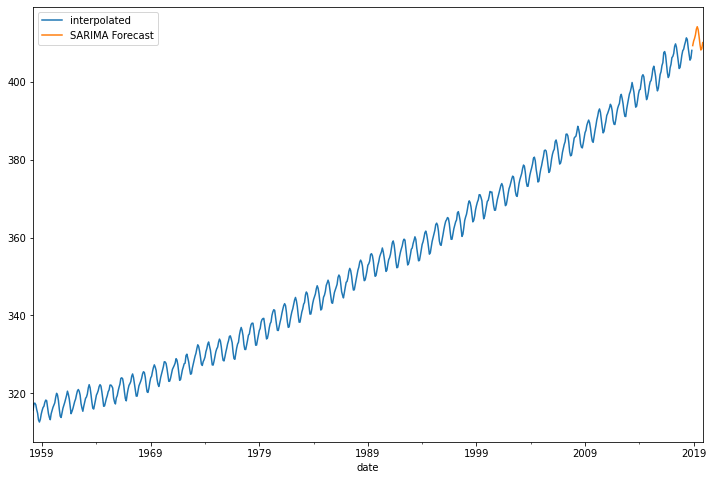

In [29]:
df['interpolated'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)

## The 'X' in SARIMAX

What if we could include some other useful information into our model other than the historical values of the label data (for ex., the holiday information in the airline number of passanger data)? 

Exogenous variable: An external variable which can be (indirectly) related to the label data, you can check for the relation by calculating the correlations between dats for the variable in question and the label data.

For statsmodels the exogenous variables will have to be converted to numerical data.